In [1]:
import pandas as pd

df = pd.read_csv(r"D:\AI\Neural_Network\Iris.csv")
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Separate features and labels
df = df.drop('Id', axis= 1)
X = df.drop('Species', axis=1)
y = df['Species']

# Encode labels to integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# One-hot encode labels
y_categorical = to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    # Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=l2(0.01))
    Dense(10, activation='relu', input_shape=(4,)),
    # Dropout(0.2),
    Dense(10, activation='relu'),
    # Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(3, activation='softmax')  # 3 classes
])

# optimizer = Adam(learning_rate=0.001) # if not choosen default is 0.001

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

In [6]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=5)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4542 - loss: 1.4081 - val_accuracy: 0.4167 - val_loss: 1.1324
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3667 - loss: 1.2290 - val_accuracy: 0.4167 - val_loss: 1.0230
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4768 - loss: 1.0143 - val_accuracy: 0.5417 - val_loss: 0.9498
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7814 - loss: 0.8443 - val_accuracy: 0.5833 - val_loss: 0.8926
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7231 - loss: 0.8209 - val_accuracy: 0.5833 - val_loss: 0.8521
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7416 - loss: 0.7447 - val_accuracy: 0.5833 - val_loss: 0.8180
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7630 - loss: 0.6758 - val_accuracy: 0.5833 - val_loss: 0.7887
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8060 - loss: 0.6071 - val_accuracy: 0.6250 - v

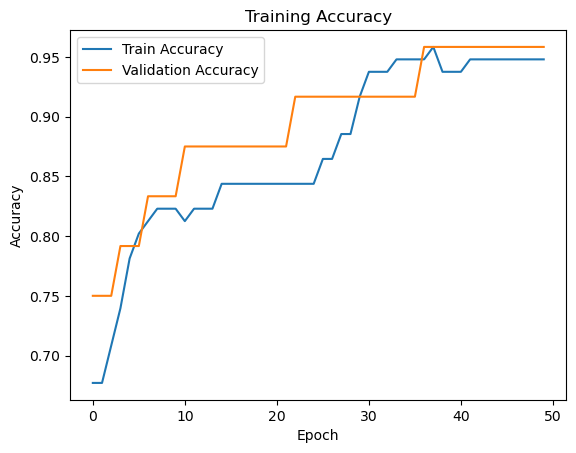

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Accuracy")
plt.show()


In [14]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.1204
Test Accuracy: 100.00%


In [16]:
# Predict on a sample
import numpy as np

sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Should be Setosa
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
predicted_class = encoder.inverse_transform([np.argmax(prediction)])
print(f"Predicted Class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Class: Iris-setosa
